In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
pd.set_option('display.max_columns', None)

In [25]:
n = 32
arboles = f'../labs/arboles_1000_head.csv'
regresion = f'../runs/run_{n}/regression_{n}_head.csv'
normal = f'../runs/run_{n}/normalizaded_{n}_head.csv'
result = f'../runs/run_{n}/calculo_bio_car_{n}_head.csv'
#/home/gomosak/conafor/SEByc/runs/run_15/regression_15_head.csv /home/gomosak/conafor/SEByc/runs/run_15/calculo_bio_car_15_head.csv

In [26]:
df = pd.read_csv(arboles)

In [27]:
biomasa_eq = pd.read_csv(regresion)

In [28]:
nor = pd.read_csv(normal)

In [29]:
re = pd.read_csv(result)

In [30]:
df

,id,anio_levantamiento,conglomerado,sitio,condicion,especie_id,familia,genero,epiteto,categoria_infra,infraespecie,numero_arbol,numero_tallo,tallos,diametro,altura,latitud,longitud,clave_ecoregion_n2,clave_bur,referencia_1,referencia_2,user_id,created_at,updated_at,grado_putrefaccion,clave_ecoregion_n1,clave_ecoregion_n3,clave_ecoregion_n4,estado_inegi,estado,edad
0,1,2005,60,1,Vivo,680.0,Ericaceae,Arctostaphylos,NaN,NaN,NaN,1,NaN,3.0,8.3,3.20,32.515597,-116.350450,11.1,MXL,caracteristica_vegetacion_mayor,107497,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,11,11.1.1,11.1.1.3,2,Baja California,NaN
1,2,2005,64,4,Vivo,26426.0,Pinaceae,Pinus,quadrifolia,NaN,NaN,1,NaN,0.0,14.0,5.50,32.532903,-116.140585,11.1,MXL,caracteristica_vegetacion_mayor,101063,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,11,11.1.1,11.1.1.3,2,Baja California,NaN
2,3,2005,153,1,Vivo,26426.0,Pinaceae,Pinus,quadrifolia,NaN,NaN,1,NaN,NaN,17.0,5.50,32.448351,-116.077138,11.1,BCO,caracteristica_arbolado,1,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,11,11.1.3,11.1.3.1,2,Baja California,74.0
3,4,2005,153,1,Vivo,26426.0,Pinaceae,Pinus,quadrifolia,NaN,NaN,2,NaN,NaN,14.5,5.85,32.448351,-116.077138,11.1,BCO,caracteristica_arbolado,2,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,11,11.1.3,11.1.3.1,2,Baja California,61.0
4,5,2005,153,1,Vivo,26426.0,Pinaceae,Pinus,quadrifolia,NaN,NaN,3,NaN,NaN,21.0,6.25,32.448351,-116.077138,11.1,BCO,caracteristica_arbolado,3,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,11,11.1.3,11.1.3.1,2,Baja California,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,997,2005,1325,4,Vivo,28479.0,Cactaceae,Lophocereus,schottii,NaN,NaN,4,NaN,48.0,0.0,2.80,31.778306,-112.995291,10.2,MXnL,caracteristica_vegetacion_mayor,112394,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,10,10.2.2,10.2.2.6,26,Sonora,NaN
997,998,2005,1325,4,Vivo,3736.0,Cactaceae,Stenocereus,NaN,NaN,NaN,5,NaN,19.0,0.0,4.70,31.778306,-112.995291,10.2,MXnL,caracteristica_vegetacion_mayor,112395,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,10,10.2.2,10.2.2.6,26,Sonora,NaN
998,999,2005,1329,1,Vivo,13840.0,Cactaceae,Carnegiea,gigantea,NaN,NaN,1,NaN,0.0,0.0,6.30,31.792029,-112.785370,10.2,MXnL,caracteristica_vegetacion_mayor,112380,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,10,10.2.2,10.2.2.6,26,Sonora,NaN
999,1000,2005,1329,1,Vivo,31013.0,Fabaceae,Olneya,tesota,NaN,NaN,2,NaN,0.0,9.6,4.00,31.792029,-112.785370,10.2,MXnL,caracteristica_vegetacion_mayor,112381,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,10,10.2.2,10.2.2.6,26,Sonora,NaN


# check


In [9]:
biomasa_eq.is_predicted.value_counts()

is_predicted
0.0    9577
2.0     311
1.0     113
Name: count, dtype: int64

In [10]:
biomasa_eq.altura[biomasa_eq.altura == 0].value_counts()

altura
0.0    83
Name: count, dtype: int64

In [11]:
biomasa_eq.altura[biomasa_eq.diametro == 0].value_counts()


altura
0.00    83
1.30     2
0.90     2
1.20     2
0.34     1
1.10     1
Name: count, dtype: int64

In [12]:
biomasa_eq.diametro[biomasa_eq.diametro == 0].value_counts()


diametro
0.0    91
Name: count, dtype: int64

In [22]:
nor[nor.diametro == 0]

,id,anio_levantamiento,conglomerado,sitio,condicion,especie_id,familia,genero,epiteto,categoria_infra,infraespecie,numero_arbol,numero_tallo,tallos,diametro,is_predicted,altura,latitud,longitud,clave_ecoregion_n2,clave_bur,referencia_1,referencia_2,user_id,created_at,updated_at,grado_putrefaccion,clave_ecoregion_n1,clave_ecoregion_n3,clave_ecoregion_n4,estado_inegi,estado,edad,volumen_eq,biomasa_eq,densidad_eq
1034,1035,2005,1594,1,Vivo,13840.0,Cactaceae,Carnegiea,gigantea,NaN,NaN,1,NaN,0.0,0.0,0.0,0.34,31.592590,-113.083153,10.2,MXL,caracteristica_vegetacion_mayor,103260,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,10,10.2.2,10.2.2.6,26,Sonora,NaN,NaN,[b]*0.447,0.55779
1238,1239,2005,2317,3,Vivo,13840.0,Cactaceae,Carnegiea,gigantea,NaN,NaN,3,NaN,0.0,0.0,0.0,1.30,31.287299,-112.216133,10.2,MXL,caracteristica_vegetacion_mayor,105383,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,10,10.2.2,10.2.2.6,26,Sonora,NaN,NaN,[b]*0.447,0.55779
2312,2313,2005,2826,2,Vivo,3736.0,Cactaceae,Stenocereus,NaN,NaN,NaN,1,NaN,0.0,0.0,0.0,1.20,31.139946,-111.680259,10.2,MXnL,caracteristica_vegetacion_mayor,82023,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,10,10.2.2,10.2.2.6,26,Sonora,NaN,NaN,[b]*0.447,0.55779
2315,2316,2005,2826,2,Vivo,13840.0,Cactaceae,Carnegiea,gigantea,NaN,NaN,4,NaN,0.0,0.0,0.0,0.90,31.139946,-111.680259,10.2,MXnL,caracteristica_vegetacion_mayor,82026,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,10,10.2.2,10.2.2.6,26,Sonora,NaN,NaN,[b]*0.447,0.55779
2316,2317,2005,2826,2,Vivo,3736.0,Cactaceae,Stenocereus,NaN,NaN,NaN,5,NaN,0.0,0.0,0.0,0.90,31.139946,-111.680259,10.2,MXnL,caracteristica_vegetacion_mayor,82027,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,10,10.2.2,10.2.2.6,26,Sonora,NaN,NaN,[b]*0.447,0.55779
2317,2318,2005,2826,2,Vivo,13840.0,Cactaceae,Carnegiea,gigantea,NaN,NaN,6,NaN,0.0,0.0,0.0,1.10,31.139946,-111.680259,10.2,MXnL,caracteristica_vegetacion_mayor,82028,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,10,10.2.2,10.2.2.6,26,Sonora,NaN,NaN,[b]*0.447,0.55779
2324,2325,2005,2826,3,Vivo,13840.0,Cactaceae,Carnegiea,gigantea,NaN,NaN,3,NaN,0.0,0.0,0.0,1.20,31.139307,-111.679981,10.2,MXnL,caracteristica_vegetacion_mayor,79023,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,10,10.2.2,10.2.2.6,26,Sonora,NaN,NaN,[b]*0.447,0.55779
2338,2339,2005,2826,4,Vivo,3736.0,Cactaceae,Stenocereus,NaN,NaN,NaN,7,NaN,0.0,0.0,0.0,1.30,31.139418,-111.680842,10.2,MXnL,caracteristica_vegetacion_mayor,83359,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,10,10.2.2,10.2.2.6,26,Sonora,NaN,NaN,[b]*0.447,0.55779


In [23]:
biomasa_eq[nor.diametro == 0]

,id,anio_levantamiento,conglomerado,sitio,condicion,especie_id,familia,genero,epiteto,categoria_infra,infraespecie,numero_arbol,numero_tallo,tallos,diametro,altura,is_predicted,latitud,longitud,clave_ecoregion_n2,clave_bur,referencia_1,referencia_2,user_id,created_at,updated_at,grado_putrefaccion,clave_ecoregion_n1,clave_ecoregion_n3,clave_ecoregion_n4,estado_inegi,estado,edad
1034,1035,2005,1594,1,Vivo,13840.0,Cactaceae,Carnegiea,gigantea,NaN,NaN,1,NaN,0.0,0.0,0.34,0.0,31.592590,-113.083153,10.2,MXL,caracteristica_vegetacion_mayor,103260,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,10,10.2.2,10.2.2.6,26,Sonora,NaN
1238,1239,2005,2317,3,Vivo,13840.0,Cactaceae,Carnegiea,gigantea,NaN,NaN,3,NaN,0.0,0.0,1.30,0.0,31.287299,-112.216133,10.2,MXL,caracteristica_vegetacion_mayor,105383,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,10,10.2.2,10.2.2.6,26,Sonora,NaN
2312,2313,2005,2826,2,Vivo,3736.0,Cactaceae,Stenocereus,NaN,NaN,NaN,1,NaN,0.0,0.0,1.20,0.0,31.139946,-111.680259,10.2,MXnL,caracteristica_vegetacion_mayor,82023,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,10,10.2.2,10.2.2.6,26,Sonora,NaN
2315,2316,2005,2826,2,Vivo,13840.0,Cactaceae,Carnegiea,gigantea,NaN,NaN,4,NaN,0.0,0.0,0.90,0.0,31.139946,-111.680259,10.2,MXnL,caracteristica_vegetacion_mayor,82026,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,10,10.2.2,10.2.2.6,26,Sonora,NaN
2316,2317,2005,2826,2,Vivo,3736.0,Cactaceae,Stenocereus,NaN,NaN,NaN,5,NaN,0.0,0.0,0.90,0.0,31.139946,-111.680259,10.2,MXnL,caracteristica_vegetacion_mayor,82027,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,10,10.2.2,10.2.2.6,26,Sonora,NaN
2317,2318,2005,2826,2,Vivo,13840.0,Cactaceae,Carnegiea,gigantea,NaN,NaN,6,NaN,0.0,0.0,1.10,0.0,31.139946,-111.680259,10.2,MXnL,caracteristica_vegetacion_mayor,82028,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,10,10.2.2,10.2.2.6,26,Sonora,NaN
2324,2325,2005,2826,3,Vivo,13840.0,Cactaceae,Carnegiea,gigantea,NaN,NaN,3,NaN,0.0,0.0,1.20,0.0,31.139307,-111.679981,10.2,MXnL,caracteristica_vegetacion_mayor,79023,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,10,10.2.2,10.2.2.6,26,Sonora,NaN
2338,2339,2005,2826,4,Vivo,3736.0,Cactaceae,Stenocereus,NaN,NaN,NaN,7,NaN,0.0,0.0,1.30,0.0,31.139418,-111.680842,10.2,MXnL,caracteristica_vegetacion_mayor,83359,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,10,10.2.2,10.2.2.6,26,Sonora,NaN


In [14]:
biomasa_eq[nor.altura == 0]


,id,anio_levantamiento,conglomerado,sitio,condicion,especie_id,familia,genero,epiteto,categoria_infra,infraespecie,numero_arbol,numero_tallo,tallos,diametro,altura,is_predicted,latitud,longitud,clave_ecoregion_n2,clave_bur,referencia_1,referencia_2,user_id,created_at,updated_at,grado_putrefaccion,clave_ecoregion_n1,clave_ecoregion_n3,clave_ecoregion_n4,estado_inegi,estado,edad


In [16]:
nor[biomasa_eq.diametro == 0]

,id,anio_levantamiento,conglomerado,sitio,condicion,especie_id,familia,genero,epiteto,categoria_infra,infraespecie,numero_arbol,numero_tallo,tallos,diametro,altura,is_predicted,latitud,longitud,clave_ecoregion_n2,clave_bur,referencia_1,referencia_2,user_id,created_at,updated_at,grado_putrefaccion,clave_ecoregion_n1,clave_ecoregion_n3,clave_ecoregion_n4,estado_inegi,estado,edad,volumen_eq,biomasa_eq,densidad_eq


# next 

In [22]:
biomasa_eq

,id,anio_levantamiento,conglomerado,sitio,condicion,especie_id,familia,genero,epiteto,categoria_infra,infraespecie,numero_arbol,numero_tallo,tallos,diametro,altura,is_predicted,latitud,longitud,clave_ecoregion_n2,clave_bur,referencia_1,referencia_2,user_id,created_at,updated_at,grado_putrefaccion,clave_ecoregion_n1,clave_ecoregion_n3,clave_ecoregion_n4,estado_inegi,estado,edad
0,1,2005,60,1,Vivo,680.0,Ericaceae,Arctostaphylos,NaN,NaN,NaN,1,NaN,3.0,8.300000,3.20,0.0,32.515597,-116.350450,11.1,MXL,caracteristica_vegetacion_mayor,107497,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,11,11.1.1,11.1.1.3,2,Baja California,NaN
1,2,2005,64,4,Vivo,26426.0,Pinaceae,Pinus,quadrifolia,NaN,NaN,1,NaN,0.0,14.000000,5.50,0.0,32.532903,-116.140585,11.1,MXL,caracteristica_vegetacion_mayor,101063,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,11,11.1.1,11.1.1.3,2,Baja California,NaN
2,3,2005,153,1,Vivo,26426.0,Pinaceae,Pinus,quadrifolia,NaN,NaN,1,NaN,NaN,17.000000,5.50,0.0,32.448351,-116.077138,11.1,BCO,caracteristica_arbolado,1,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,11,11.1.3,11.1.3.1,2,Baja California,74.0
3,4,2005,153,1,Vivo,26426.0,Pinaceae,Pinus,quadrifolia,NaN,NaN,2,NaN,NaN,14.500000,5.85,0.0,32.448351,-116.077138,11.1,BCO,caracteristica_arbolado,2,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,11,11.1.3,11.1.3.1,2,Baja California,61.0
4,5,2005,153,1,Vivo,26426.0,Pinaceae,Pinus,quadrifolia,NaN,NaN,3,NaN,NaN,21.000000,6.25,0.0,32.448351,-116.077138,11.1,BCO,caracteristica_arbolado,3,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,11,11.1.3,11.1.3.1,2,Baja California,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,997,2005,1325,4,Vivo,28479.0,Cactaceae,Lophocereus,schottii,NaN,NaN,4,NaN,48.0,18.015075,2.80,2.0,31.778306,-112.995291,10.2,MXnL,caracteristica_vegetacion_mayor,112394,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,10,10.2.2,10.2.2.6,26,Sonora,NaN
997,998,2005,1325,4,Vivo,3736.0,Cactaceae,Stenocereus,NaN,NaN,NaN,5,NaN,19.0,27.845710,4.70,2.0,31.778306,-112.995291,10.2,MXnL,caracteristica_vegetacion_mayor,112395,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,10,10.2.2,10.2.2.6,26,Sonora,NaN
998,999,2005,1329,1,Vivo,13840.0,Cactaceae,Carnegiea,gigantea,NaN,NaN,1,NaN,0.0,36.124139,6.30,2.0,31.792029,-112.785370,10.2,MXnL,caracteristica_vegetacion_mayor,112380,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,10,10.2.2,10.2.2.6,26,Sonora,NaN
999,1000,2005,1329,1,Vivo,31013.0,Fabaceae,Olneya,tesota,NaN,NaN,2,NaN,0.0,9.600000,4.00,0.0,31.792029,-112.785370,10.2,MXnL,caracteristica_vegetacion_mayor,112381,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,10,10.2.2,10.2.2.6,26,Sonora,NaN


In [23]:
nor

,id,anio_levantamiento,conglomerado,sitio,condicion,especie_id,familia,genero,epiteto,categoria_infra,infraespecie,numero_arbol,numero_tallo,tallos,diametro,altura,is_predicted,latitud,longitud,clave_ecoregion_n2,clave_bur,referencia_1,referencia_2,user_id,created_at,updated_at,grado_putrefaccion,clave_ecoregion_n1,clave_ecoregion_n3,clave_ecoregion_n4,estado_inegi,estado,edad,carbon_eq,biomasa_eq,densidad_eq,volumen_eq
0,1,2005,60,1,Vivo,680.0,Ericaceae,Arctostaphylos,NaN,NaN,NaN,1,NaN,3.0,8.300000,3.20,0.0,32.515597,-116.350450,11.1,MXL,caracteristica_vegetacion_mayor,107497,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,11,11.1.1,11.1.1.3,2,Baja California,NaN,[b]*0.46,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.60590,NaN
1,2,2005,64,4,Vivo,26426.0,Pinaceae,Pinus,quadrifolia,NaN,NaN,1,NaN,0.0,14.000000,5.50,0.0,32.532903,-116.140585,11.1,MXL,caracteristica_vegetacion_mayor,101063,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,11,11.1.1,11.1.1.3,2,Baja California,NaN,(0.0309*[d130]**2.4722),(Exp(-3.139)*[d130]**2.585),0.41033,NaN
2,3,2005,153,1,Vivo,26426.0,Pinaceae,Pinus,quadrifolia,NaN,NaN,1,NaN,NaN,17.000000,5.50,0.0,32.448351,-116.077138,11.1,BCO,caracteristica_arbolado,1,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,11,11.1.3,11.1.3.1,2,Baja California,74.0,(0.0309*[d130]**2.4722),(Exp(-2.818)*[d130]**2.574),0.41033,NaN
3,4,2005,153,1,Vivo,26426.0,Pinaceae,Pinus,quadrifolia,NaN,NaN,2,NaN,NaN,14.500000,5.85,0.0,32.448351,-116.077138,11.1,BCO,caracteristica_arbolado,2,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,11,11.1.3,11.1.3.1,2,Baja California,61.0,(0.0309*[d130]**2.4722),(Exp(-3.139)*[d130]**2.585),0.41033,NaN
4,5,2005,153,1,Vivo,26426.0,Pinaceae,Pinus,quadrifolia,NaN,NaN,3,NaN,NaN,21.000000,6.25,0.0,32.448351,-116.077138,11.1,BCO,caracteristica_arbolado,3,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,11,11.1.3,11.1.3.1,2,Baja California,NaN,(0.0309*[d130]**2.4722),(Exp(-2.818)*[d130]**2.574),0.41033,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,997,2005,1325,4,Vivo,28479.0,Cactaceae,Lophocereus,schottii,NaN,NaN,4,NaN,48.0,18.015075,2.80,2.0,31.778306,-112.995291,10.2,MXnL,caracteristica_vegetacion_mayor,112394,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,10,10.2.2,10.2.2.6,26,Sonora,NaN,[b]*0.447,Exp(0.9173)*([d130]**1.0730),0.55779,NaN
997,998,2005,1325,4,Vivo,3736.0,Cactaceae,Stenocereus,NaN,NaN,NaN,5,NaN,19.0,27.845710,4.70,2.0,31.778306,-112.995291,10.2,MXnL,caracteristica_vegetacion_mayor,112395,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,10,10.2.2,10.2.2.6,26,Sonora,NaN,[b]*0.447,Exp(0.9173)*([d130]**1.0730),0.55779,NaN
998,999,2005,1329,1,Vivo,13840.0,Cactaceae,Carnegiea,gigantea,NaN,NaN,1,NaN,0.0,36.124139,6.30,2.0,31.792029,-112.785370,10.2,MXnL,caracteristica_vegetacion_mayor,112380,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,10,10.2.2,10.2.2.6,26,Sonora,NaN,[b]*0.447,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.55779,NaN
999,1000,2005,1329,1,Vivo,31013.0,Fabaceae,Olneya,tesota,NaN,NaN,2,NaN,0.0,9.600000,4.00,0.0,31.792029,-112.785370,10.2,MXnL,caracteristica_vegetacion_mayor,112381,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,10,10.2.2,10.2.2.6,26,Sonora,NaN,[b]*0.4453,Exp(0.9173)*([d130]**1.0730),0.82075,NaN


In [49]:
nor.altura[biomasa_eq.altura != nor.altura]

15      0.300000
47      0.300000
70      0.300000
71      0.300000
74      0.300000
          ...   
9605    0.300000
9606    0.300000
9610    0.300000
9686    0.300000
9744    2.201246
Name: altura, Length: 110, dtype: float64

In [50]:
biomasa_eq.altura[biomasa_eq.altura != nor.altura]


15           NaN
47           NaN
70           NaN
71           NaN
74           NaN
          ...   
9605         NaN
9606         NaN
9610         NaN
9686         NaN
9744    2.201246
Name: altura, Length: 110, dtype: float64

In [9]:
nor

,id,anio_levantamiento,conglomerado,sitio,condicion,especie_id,familia,genero,epiteto,categoria_infra,infraespecie,numero_arbol,numero_tallo,tallos,diametro,altura,is_predicted,latitud,longitud,clave_ecoregion_n2,clave_bur,referencia_1,referencia_2,user_id,created_at,updated_at,grado_putrefaccion,clave_ecoregion_n1,clave_ecoregion_n3,clave_ecoregion_n4,estado_inegi,estado,edad,carbon_eq,biomasa_eq,densidad_eq,volumen_eq
0,1,2005,60,1,Vivo,680.0,Ericaceae,Arctostaphylos,NaN,NaN,NaN,1,NaN,3.0,8.3,3.20,0.0,32.515597,-116.350450,11.1,MXL,caracteristica_vegetacion_mayor,107497,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,11,11.1.1,11.1.1.3,2,Baja California,NaN,[b]*0.46,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.60590,NaN
1,2,2005,64,4,Vivo,26426.0,Pinaceae,Pinus,quadrifolia,NaN,NaN,1,NaN,0.0,14.0,5.50,0.0,32.532903,-116.140585,11.1,MXL,caracteristica_vegetacion_mayor,101063,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,11,11.1.1,11.1.1.3,2,Baja California,NaN,(0.0309*[d130]**2.4722),(Exp(-3.139)*[d130]**2.585),0.41033,NaN
2,3,2005,153,1,Vivo,26426.0,Pinaceae,Pinus,quadrifolia,NaN,NaN,1,NaN,NaN,17.0,5.50,0.0,32.448351,-116.077138,11.1,BCO,caracteristica_arbolado,1,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,11,11.1.3,11.1.3.1,2,Baja California,74.0,(0.0309*[d130]**2.4722),(Exp(-2.818)*[d130]**2.574),0.41033,NaN
3,4,2005,153,1,Vivo,26426.0,Pinaceae,Pinus,quadrifolia,NaN,NaN,2,NaN,NaN,14.5,5.85,0.0,32.448351,-116.077138,11.1,BCO,caracteristica_arbolado,2,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,11,11.1.3,11.1.3.1,2,Baja California,61.0,(0.0309*[d130]**2.4722),(Exp(-3.139)*[d130]**2.585),0.41033,NaN
4,5,2005,153,1,Vivo,26426.0,Pinaceae,Pinus,quadrifolia,NaN,NaN,3,NaN,NaN,21.0,6.25,0.0,32.448351,-116.077138,11.1,BCO,caracteristica_arbolado,3,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,11,11.1.3,11.1.3.1,2,Baja California,NaN,(0.0309*[d130]**2.4722),(Exp(-2.818)*[d130]**2.574),0.41033,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,9997,2005,5379,3,Vivo,11688.0,Pinaceae,Pinus,durangensis,NaN,NaN,1,NaN,NaN,10.3,6.00,0.0,30.571642,-109.603517,12.1,BE,caracteristica_arbolado,8682,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,12,12.1.1,12.1.1.1,26,Sonora,17.0,(0.021*[d130]**2.6451),(Exp(-2.084)*[d130]**2.323),0.42956,NaN
9997,9998,2005,5379,3,Vivo,11056.0,Fagaceae,Quercus,depressipes,NaN,NaN,2,NaN,NaN,8.1,3.00,0.0,30.571642,-109.603517,12.1,BE,caracteristica_arbolado,8683,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,12,12.1.1,12.1.1.1,26,Sonora,NaN,(0.4726*[b]),Exp(-2.27)*([d130]**2.39),0.62410,NaN
9998,9999,2005,5379,3,Vivo,11688.0,Pinaceae,Pinus,durangensis,NaN,NaN,4,NaN,NaN,18.0,7.00,0.0,30.571642,-109.603517,12.1,BE,caracteristica_arbolado,8684,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,12,12.1.1,12.1.1.1,26,Sonora,NaN,(0.021*[d130]**2.6451),(Exp(-3.416)*[d130]**2.715),0.42956,NaN
9999,10000,2005,5379,4,Vivo,11688.0,Pinaceae,Pinus,durangensis,NaN,NaN,1,NaN,NaN,8.3,5.10,0.0,30.571697,-109.604350,12.1,BE,caracteristica_arbolado,8685,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,12,12.1.1,12.1.1.1,26,Sonora,NaN,(0.021*[d130]**2.6451),(Exp(-2.084)*[d130]**2.323),0.42956,NaN


In [15]:
row = nor.iloc[0]
row

id                                                                    1
anio_levantamiento                                                 2005
conglomerado                                                         60
sitio                                                                 1
condicion                                                          Vivo
especie_id                                                        680.0
familia                                                       Ericaceae
genero                                                   Arctostaphylos
epiteto                                                             NaN
categoria_infra                                                     NaN
infraespecie                                                        NaN
numero_arbol                                                          1
numero_tallo                                                        NaN
tallos                                                          

In [14]:
not pd.isnull(a.volumen_eq)

False

In [10]:
column_counts = Counter(nor['volumen_eq'])
column_counts

Counter({nan: 9902, '(3.14159 * (([d130] / 2 / 100) ** 2) * [ht])': 99})

In [31]:
re

,id,anio_levantamiento,conglomerado,sitio,condicion,especie_id,familia,genero,epiteto,categoria_infra,infraespecie,numero_arbol,numero_tallo,tallos,diametro,altura,is_predicted,latitud,longitud,clave_ecoregion_n2,clave_bur,referencia_1,referencia_2,user_id,created_at,updated_at,grado_putrefaccion,clave_ecoregion_n1,clave_ecoregion_n3,clave_ecoregion_n4,estado_inegi,estado,edad,carbon_eq,biomasa_eq,densidad_eq,volumen_eq,volumen,biomasa,carbono
0,1,2005,60,1,Vivo,680.0,Ericaceae,Arctostaphylos,NaN,NaN,NaN,1,NaN,3.0,8.300000,3.20,0.0,32.515597,-116.350450,11.1,MXL,caracteristica_vegetacion_mayor,107497,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,11,11.1.1,11.1.1.3,2,Baja California,NaN,[b]*0.46,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.60590,NaN,NaN,9.939069,4.571972
1,2,2005,64,4,Vivo,26426.0,Pinaceae,Pinus,quadrifolia,NaN,NaN,1,NaN,0.0,14.000000,5.50,0.0,32.532903,-116.140585,11.1,MXL,caracteristica_vegetacion_mayor,101063,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,11,11.1.1,11.1.1.3,2,Baja California,NaN,(0.0309*[d130]**2.4722),(Exp(-3.139)*[d130]**2.585),0.41033,NaN,NaN,39.764048,21.057956
2,3,2005,153,1,Vivo,26426.0,Pinaceae,Pinus,quadrifolia,NaN,NaN,1,NaN,NaN,17.000000,5.50,0.0,32.448351,-116.077138,11.1,BCO,caracteristica_arbolado,1,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,11,11.1.3,11.1.3.1,2,Baja California,74.0,(0.0309*[d130]**2.4722),(Exp(-2.818)*[d130]**2.574),0.41033,NaN,NaN,87.767489,34.030968
3,4,2005,153,1,Vivo,26426.0,Pinaceae,Pinus,quadrifolia,NaN,NaN,2,NaN,NaN,14.500000,5.85,0.0,32.448351,-116.077138,11.1,BCO,caracteristica_arbolado,2,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,11,11.1.3,11.1.3.1,2,Baja California,61.0,(0.0309*[d130]**2.4722),(Exp(-3.139)*[d130]**2.585),0.41033,NaN,NaN,43.539748,22.966375
4,5,2005,153,1,Vivo,26426.0,Pinaceae,Pinus,quadrifolia,NaN,NaN,3,NaN,NaN,21.000000,6.25,0.0,32.448351,-116.077138,11.1,BCO,caracteristica_arbolado,3,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,11,11.1.3,11.1.3.1,2,Baja California,NaN,(0.0309*[d130]**2.4722),(Exp(-2.818)*[d130]**2.574),0.41033,NaN,NaN,151.199590,57.378477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,997,2005,1325,4,Vivo,28479.0,Cactaceae,Lophocereus,schottii,NaN,NaN,4,NaN,48.0,18.015075,2.80,2.0,31.778306,-112.995291,10.2,MXnL,caracteristica_vegetacion_mayor,112394,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,10,10.2.2,10.2.2.6,26,Sonora,NaN,[b]*0.447,Exp(0.9173)*([d130]**1.0730),0.55779,NaN,NaN,55.677002,24.887620
997,998,2005,1325,4,Vivo,3736.0,Cactaceae,Stenocereus,NaN,NaN,NaN,5,NaN,19.0,27.845710,4.70,2.0,31.778306,-112.995291,10.2,MXnL,caracteristica_vegetacion_mayor,112395,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,10,10.2.2,10.2.2.6,26,Sonora,NaN,[b]*0.447,Exp(0.9173)*([d130]**1.0730),0.55779,NaN,NaN,88.839065,39.711062
998,999,2005,1329,1,Vivo,13840.0,Cactaceae,Carnegiea,gigantea,NaN,NaN,1,NaN,0.0,36.124139,6.30,2.0,31.792029,-112.785370,10.2,MXnL,caracteristica_vegetacion_mayor,112380,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,10,10.2.2,10.2.2.6,26,Sonora,NaN,[b]*0.447,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.55779,NaN,NaN,253.539791,113.332287
999,1000,2005,1329,1,Vivo,31013.0,Fabaceae,Olneya,tesota,NaN,NaN,2,NaN,0.0,9.600000,4.00,0.0,31.792029,-112.785370,10.2,MXnL,caracteristica_vegetacion_mayor,112381,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,10,10.2.2,10.2.2.6,26,Sonora,NaN,[b]*0.4453,Exp(0.9173)*([d130]**1.0730),0.82075,NaN,NaN,28.337097,12.618509


In [32]:
re.carbono.isnull().any()

np.False_

In [33]:
re.biomasa.isnull().any()



np.False_

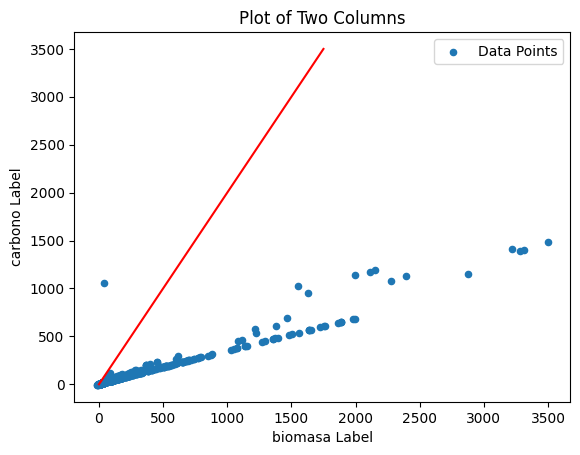

In [49]:
x = re.plot(kind='scatter', x='biomasa', y='carbono', label='Data Points')

# Now, use matplotlib's plot and axhline directly
# Plot the line x = y
plt.plot([x / 2 for x in range(3500)],range(3500), color='red', label='x = y')

# Plot the line x = y
#ax.plot(range(1000),range(1000), color='red', label='x = y')
# Add labels and title
plt.xlabel('biomasa Label')
plt.ylabel('carbono Label')
plt.title('Plot of Two Columns')
plt.show()


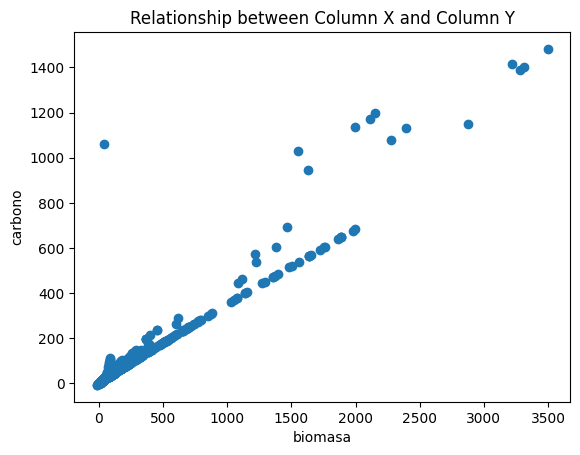

In [52]:
plt.scatter(re['biomasa'], re['carbono'])

# Add labels and title
plt.xlabel('biomasa')
plt.ylabel('carbono')
plt.title('Relationship between Column X and Column Y')

# Show the plot
plt.show()

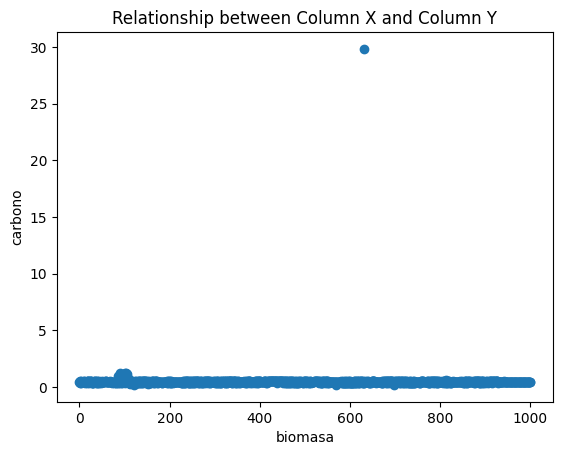

In [56]:
plt.scatter(range(len(re)),re['carbono']/re['biomasa'])

# Add labels and title
plt.xlabel('biomasa')
plt.ylabel('carbono')
plt.title('Relationship between Column X and Column Y')

# Show the plot
plt.show()

In [58]:
ree = re[re['carbono']/re['biomasa']>5]

,id,anio_levantamiento,conglomerado,sitio,condicion,especie_id,familia,genero,epiteto,categoria_infra,infraespecie,numero_arbol,numero_tallo,tallos,diametro,altura,is_predicted,latitud,longitud,clave_ecoregion_n2,clave_bur,referencia_1,referencia_2,user_id,created_at,updated_at,grado_putrefaccion,clave_ecoregion_n1,clave_ecoregion_n3,clave_ecoregion_n4,estado_inegi,estado,edad,carbon_eq,biomasa_eq,densidad_eq,volumen_eq,volumen,biomasa,carbono
632,633,2005,526,4,Tocón,16945.0,Pinaceae,Pinus,jeffreyi,NaN,NaN,6,NaN,NaN,60.0,0.3,0.0,32.100447,-115.931521,11.1,BCO,caracteristica_arbolado,559,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,11,11.1.3,11.1.3.1,2,Baja California,NaN,(0.021*[d130]**2.6451),(0.058)*((([d130]**2)*[ht])**0.919),0.37733,(3.14159 * (([d130] / 2 / 100) ** 2) * [ht]),0.084823,35.57496,1060.735655


In [ ]:
(0.021*[d130]**2.6451)

In [59]:
.021*60**2.64

1038.815917881894

In [61]:
de = re.drop(632, axis=0)

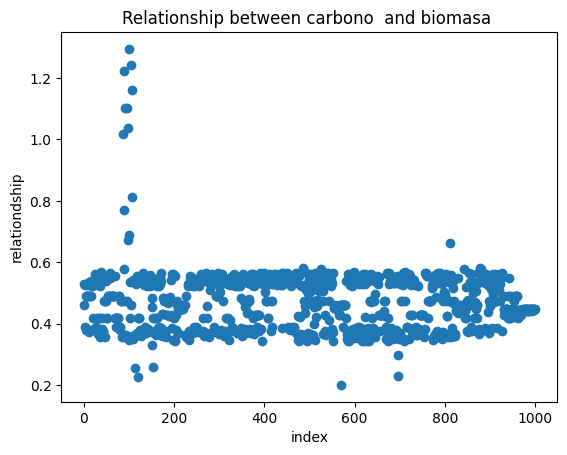

In [64]:
plt.scatter(range(len(de)),de['carbono']/de['biomasa'])

# Add labels and title
plt.xlabel('index')
plt.ylabel('relationdship')
plt.title('Relationship between carbono  and biomasa ')

# Show the plot
plt.show()